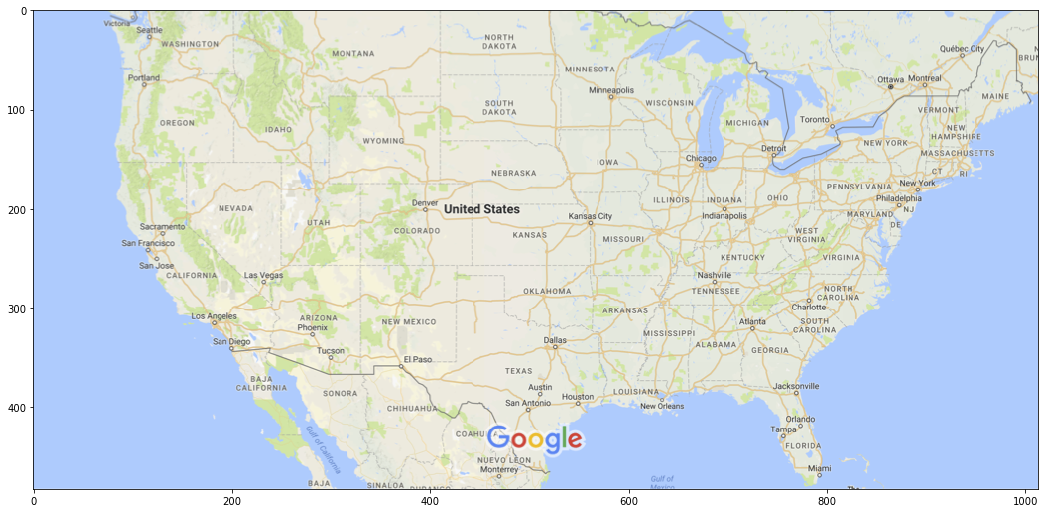

In [16]:
import sys 
import matplotlib.pyplot as plt 
import numpy as np 

sys.path.append('..')
from utils import rotate_counterclockwise, normalize, get_usalabels, get_D, computeXXT, computeX
from scipy.misc import imread
img = imread('../datasets/usamap.png')
D = get_D() 

fig=plt.figure(figsize=(18, 18))
plt.imshow(img)
plt.show()

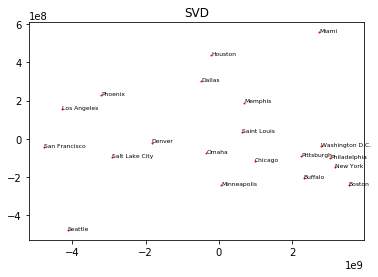

In [18]:
n = len(D)
XXT = computeXXT(D)
X = computeX(XXT,2)

Xr = rotate_counterclockwise(X, 180)
Xn = normalize(Xr, origin='center')

height= img.shape[0]
width = img.shape[1]

imgscale = 0.8*np.array([[width, -height]]) # 0.95 compensates for the frame
imgfactor= np.tile(imgscale, (n,1))
imgscale = np.array([[0.55*width, 0.5*height]])
imgintercept= np.tile(imgscale, (n,1))

Xs = imgfactor * Xr + imgintercept#scaled X


fig, ax = plt.subplots()
# implot = ax.imshow(img, origin='upper')
ax.scatter(Xs[:,0], Xs[:,1], c='r', s=1)
for i, txt in enumerate(get_usalabels()):
    ax.annotate(txt, (Xs[i,0],Xs[i,1]), fontsize=6)
plt.title('SVD')
plt.show()
